In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Week 9 Lecture 1 Demo

_**Adapted from Chapter 10 of Nolan, Gonzalez and Lau**_

In the United States, many diners will leave a tip for their waiter or waitress as the diners pay for the meal. Although it is customary in the US to offer 15% of the total bill as tip, perhaps some restaurants have more generous patrons than others.

One particular waiter was so interested in how much tip he could expect to get that he collected information about all the tables he served during a month of employment.

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can plot a histogram of the tip amounts:

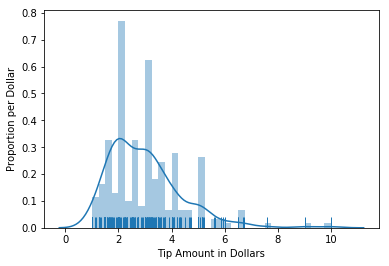

In [6]:
sns.distplot(tips['tip'], bins=np.arange(0, 10.1, 0.25), rug=True)
plt.xlabel('Tip Amount in Dollars')
plt.ylabel('Proportion per Dollar');

There are already some interesting patterns in the data. For example, there is a clear mode at $\$2$ and most tips seem to be in multiples of $\$0.50$.

For now, we are most interested in the percent tip: the tip amount divided by the bill amount. We can create a column in our DataFrame for this variable and show its distribution.

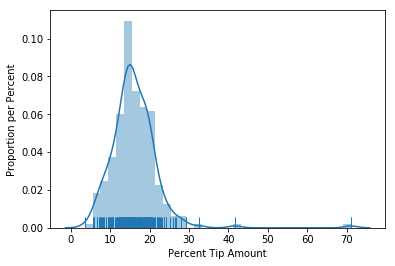

In [5]:
tips['pcttip'] = tips['tip'] / tips['total_bill'] * 100
sns.distplot(tips['pcttip'], rug=True)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

It looks like one table left our waiter a tip of $70\%$! However, most of the tips percentages are under $30\%$. Let's zoom into that part of the distribution.

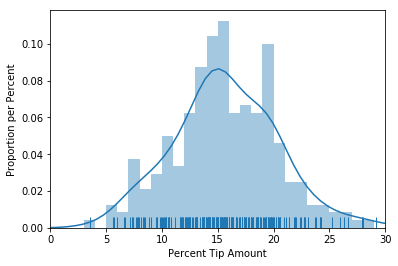

In [7]:
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)
plt.xlim(0, 30)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

We can see that the distribution is roughly centered at $15\%$ with another potential mode at $20\%$. Suppose our waiter is interested in predicting how much percent tip he will get from a given table. To address this question, we can create a model for how much tip the waiter will get.

### Loss Function 

Let's suppose we are trying to compare two choices for $\theta$: $10\%$ and $15\%$. We can mark both of these choices on our distribution:

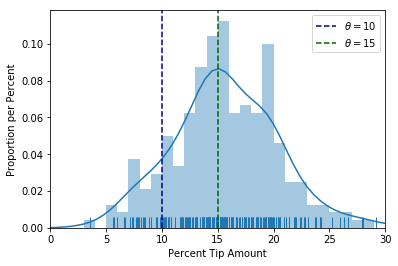

In [9]:
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)

plt.axvline(x=10, c='darkblue', linestyle='--', label=r'$ \theta = 10$')
plt.axvline(x=15, c='darkgreen', linestyle='--', label=r'$ \theta = 15$')
plt.legend()

plt.xlim(0, 30)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

Intuitively, it looks like choosing $ \theta = 15 $ makes more sense than $ \theta = 10 $ given our dataset. Why is this? When we look at the points in our data, we can see that more points fall close to $15$ than they do to $10$.

Although it seems apparent that $ \theta = 15 $ is a better choice than $ \theta = 10 $, it is not so clear whether $ \theta = 15 $ is a better choice than $ \theta = 16 $. To make precise choices between different values of $ \theta $, we would like to assign each value of $ \theta $ a number that measures how "good" it is for our data. That is, we want a function that takes as input a value of $ \theta $ and the points in our dataset, outputting a single number that we will use to select the best value of $ \theta $ that we can.

To precisely decide which value of $ \theta $ is best, we define a **loss function**. A loss function is a mathematical function that takes in an estimate $ \theta $ and the points in our dataset $y_1, y_2, \ldots, y_n$. It outputs a single number, the **loss**, that measures how well $ \theta $ fits our data. In mathematical notation, we want to create the function:

$$ L(\theta, y_1, y_2, \ldots, y_n) =\ \ldots $$

By convention, the loss function outputs lower values for preferable values of $ \theta $ and larger values for worse values of $ \theta $. To fit our model, we select the value of $ \theta $ that produces a lower loss than all other choices of $ \theta $—the $ \theta $ that **minimizes the loss**. We use the notation $ \hat{\theta} $ to denote the value of $ \theta $ that minimizes a specified loss function.


### Mean Squared Error

A common loss function is the *mean squared error*. Here's the idea:

1. We select a value of $ \theta $.
2. For each value in our dataset, take the squared difference between the value and theta: $ (y_i - \theta)^2 $ . Squaring the difference in a simple way to convert negative differences into positive ones. We want to do this because if our point $ y_i = 14 $, $ \theta = 10 $ and $ \theta = 18 $ are equally far away from the point and are thus equally "bad".
3. To compute the final loss, take the average of each of the individual squared differences.

This gives us a final loss function of:

$$
\begin{aligned}
L(\theta, y_1, y_2, \ldots, y_n)
&= \text{average}\left\{ (y_1 - \theta)^2, (y_2 - \theta)^2, \ldots, (y_n - \theta)^2 \right\} \\
&= \frac{1}{n} \left((y_1 - \theta)^2 + (y_2 - \theta)^2 + \ldots + (y_n - \theta)^2 \right) \\
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \theta)^2\\
\end{aligned}
$$

Creating a Python function to compute the loss is simple:

In [11]:
def mse_loss(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

In [12]:
def try_thetas(thetas, y_vals, xlims, loss_fn=mse_loss, figsize=(10, 7), cols=3):
    if not isinstance(y_vals, np.ndarray):
        y_vals = np.array(y_vals)
    rows = int(np.ceil(len(thetas) / cols))
    plt.figure(figsize=figsize)
    for i, theta in enumerate(thetas):
        ax = plt.subplot(rows, cols, i + 1)
        sns.rugplot(y_vals, height=0.1, ax=ax)
        plt.axvline(theta, linestyle='--',
                    label=rf'$ \theta = {theta} $')
        plt.title(f'Loss = {loss_fn(theta, y_vals):.2f}')
        plt.xlim(*xlims)
        plt.yticks([])
        plt.legend()
    plt.tight_layout()

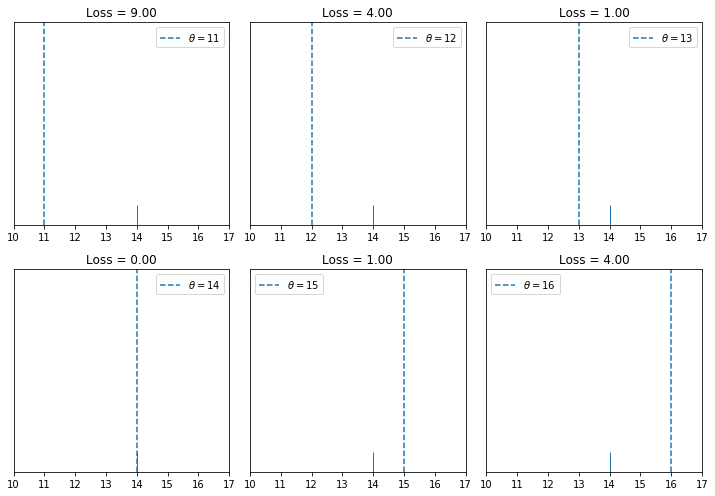

In [13]:
try_thetas(thetas=[11, 12, 13, 14, 15, 16],
           y_vals=[14], xlims=(10, 17))

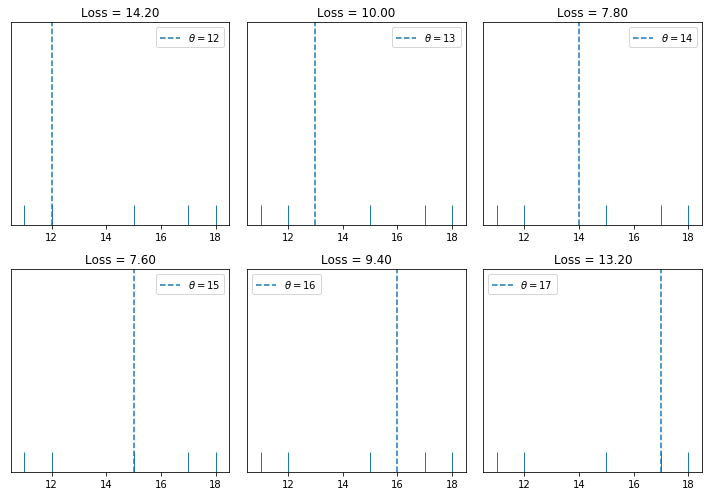

In [14]:
try_thetas(thetas=[12, 13, 14, 15, 16, 17],
           y_vals=[11, 12, 15, 17, 18],
           xlims=(10.5, 18.5))

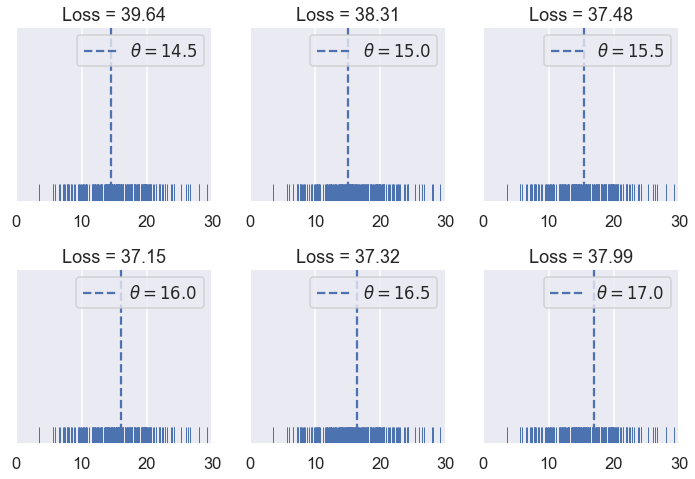

In [20]:
try_thetas(thetas=np.arange(14.5, 17.1, 0.5),
           y_vals=tips['pcttip'],
           xlims=(0, 30))

As before, we've created an interactive widget to test different values of $ \theta $.

### Minimizing the Loss

So far, we have found the best value of $ \theta $ by simply trying out a bunch of values and then picking the one with the least loss. Although this method works decently well, we can find a better method by using the properties of our loss function.

For the following example, we use a dataset containing five points: $ \textbf{y} = [ 11, 12, 15, 16, 17 ] $.

In the plots above, we've used integer $ \theta $ values in between 12 and 17. When we change $ \theta $, the loss seems to start high (at 10.92), decrease until $ \theta = 15 $, then increase again. We can see that the loss changes as $ \theta $ changes, so let's make a plot comparing the loss to $ \theta $ for each of the six $ \theta $s we've tried.

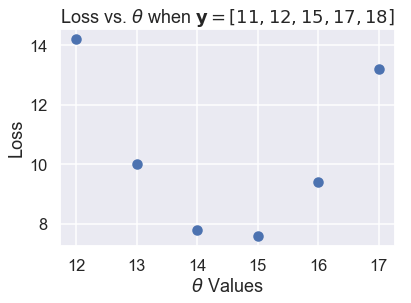

In [33]:
# HIDDEN
thetas = np.array([12, 13, 14, 15, 16, 17])
y_vals = np.array([11, 12, 15, 17, 18])
losses = [mse_loss(theta, y_vals) for theta in thetas]

plt.scatter(thetas, losses)
plt.title(r'Loss vs. $ \theta $ when $\bf{y}$$ = [11, 12, 15, 17, 18] $')
plt.xlabel(r'$ \theta $ Values')
plt.ylabel('Loss');

The scatter plot shows the downward, then upward trend that we noticed before. We can try more values of $ \theta $ to see a complete curve that shows how the loss changes as $ \theta $ changes.

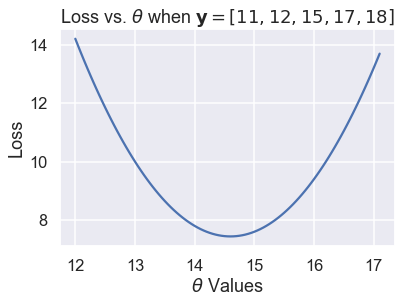

In [34]:
# HIDDEN
thetas = np.arange(12, 17.1, 0.05)
y_vals = np.array([11, 12, 15, 17, 18])
losses = [mse_loss(theta, y_vals) for theta in thetas]

plt.plot(thetas, losses)
plt.title(r'Loss vs. $ \theta $ when $\bf{y}$$ = [11, 12, 15, 17, 18] $')
plt.xlabel(r'$ \theta $ Values')
plt.ylabel('Loss');

The plot above shows that in fact, $ \theta = 15$ was not the best choice; a $ \theta $ between 14 and 15 would have gotten a lower loss. We can use calculus to find that minimizing value of $ \theta $ exactly. At the minimum loss, the derivative of the loss function with respect to $ \theta $ is 0.

First, we start with our loss function:

$$
\begin{aligned}
L(\theta, \textbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \theta)^2\\
\end{aligned}
$$

Next, we plug in our points $ \textbf{y} = [11, 12, 15, 17, 18] $:

$$
\begin{aligned}
L(\theta, \textbf{y})
&= \frac{1}{5} \big((11 - \theta)^2 + (12 - \theta)^2 + (15 - \theta)^2 + (17 - \theta)^2 + (18 - \theta)^2 \big)\\
\end{aligned}
$$

To find the value of $ \theta $ that minimizes this function, we compute the derivative with respect to $ \theta $:

$$
\begin{aligned}
\frac{\partial}{\partial \theta} L(\theta, \textbf{y})
&= \frac{1}{5} \big(-2(11 - \theta) - 2(12 - \theta) - 2(15 - \theta) - 2(17 - \theta) -2(18 - \theta) \big)\\
&= \frac{1}{5} \big(10 \cdot \theta - 146 \big)\\
\end{aligned}
$$

Then, we find the value of $ \theta $ where the derivative is zero:

$$
\begin{aligned}
\frac{1}{5} \big(10 \cdot \theta - 146 \big) &= 0 \\
10 \cdot \theta - 146 &= 0 \\
\theta &= 14.6
\end{aligned}
$$

We've found the minimizing $ \theta $, and as expected, it is between 14 and 15. We denote the $ \theta $ that minimizes the loss $ \hat{\theta} $. Thus, for the dataset $ \textbf{y} = [11, 12, 15, 17, 18] $ and the MSE loss function:

$$ \hat{\theta} = 14.6 $$

If we happen to compute the mean of the data values, we notice a curious equivalence:

$$ \text{mean} (\textbf{y}) = \hat{\theta} = 14.6 $$

### Back to the Original Dataset

We no longer have to test out different values of $ \theta $ as we did before. We can compute the mean tip percentage in one go:

In [18]:
np.mean(tips['pcttip'])

16.080258172250463

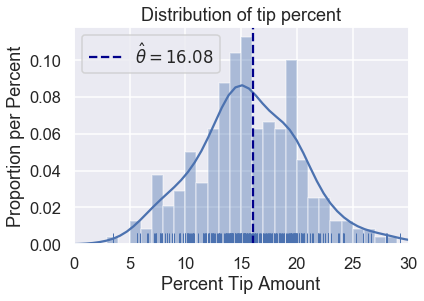

In [37]:
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)

plt.axvline(x=16.08, c='darkblue', linestyle='--', label=r'$ \hat \theta = 16.08$')
plt.legend()

plt.xlim(0, 30)
plt.title('Distribution of tip percent')
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');